In [54]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from collections import Counter

In [3]:
#importing the dataset
breastCancer = datasets.load_breast_cancer()
data = breastCancer.data
res = breastCancer.target

xtrain,xtest,ytrain,ytest = train_test_split(data,res,random_state=0)


In [71]:
from sklearn.neighbors import KNeighborsClassifier

x_axis = []
y_axis = []
#checking which set of parameters will give us the best result
for i in range(1,25,2):
    clf = KNeighborsClassifier(n_neighbors= i)
    print(i," ",cross_val_score(clf,xtrain,ytrain).mean())
    x_axis.append(i)
    y_axis.append(cross_val_score(clf,xtrain,ytrain).mean())

1   0.9248826291079811
3   0.9295774647887324
5   0.931924882629108
7   0.931924882629108
9   0.9295774647887324
11   0.92018779342723
13   0.9154929577464789
15   0.9131455399061034
17   0.9131455399061034
19   0.9178403755868545
21   0.9154929577464789
23   0.9107981220657276


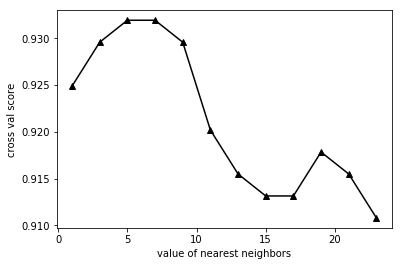

In [35]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis,color = "black",marker='^')
plt.xlabel("value of nearest neighbors")
plt.ylabel("cross val score")
plt.show()
#max value at k = 7

In [68]:
def train():
    return

def predictOnePoint(xtrain,ytrain,x_point,k):
    distance = []
    for i in range(len(xtrain)):
        dist = ((xtrain[i,:] - x_point)**2).sum()
        distance.append([dist,i])
        
    distance = sorted(distance)
    
    #checking k neighbors
    result = []
    for i in range(k):
        index = distance[i][1]
        result.append(ytrain[index])
        
    predictedClass = Counter(result).most_common(1)[0][0] #predicts the most common element in the result list
    
    return predictedClass

def predict(xtrain,ytrain,xtest,k):
    y_pred = []
    for x in xtest:
        y_pred.append(predictOnePoint(xtrain,ytrain,x,k))
    return y_pred

In [70]:
y_pred = predict(xtrain,ytrain,xtest,7)
accuracy_score(ytest,y_pred)

0.9440559440559441

In [58]:
#an example of how counte works
a = [1,2,3]
Counter(a).most_common(1)[0][0]

1